In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [45]:
data = pd.read_csv("..//Data//cleaned_car_data.csv", parse_dates=["Year"])

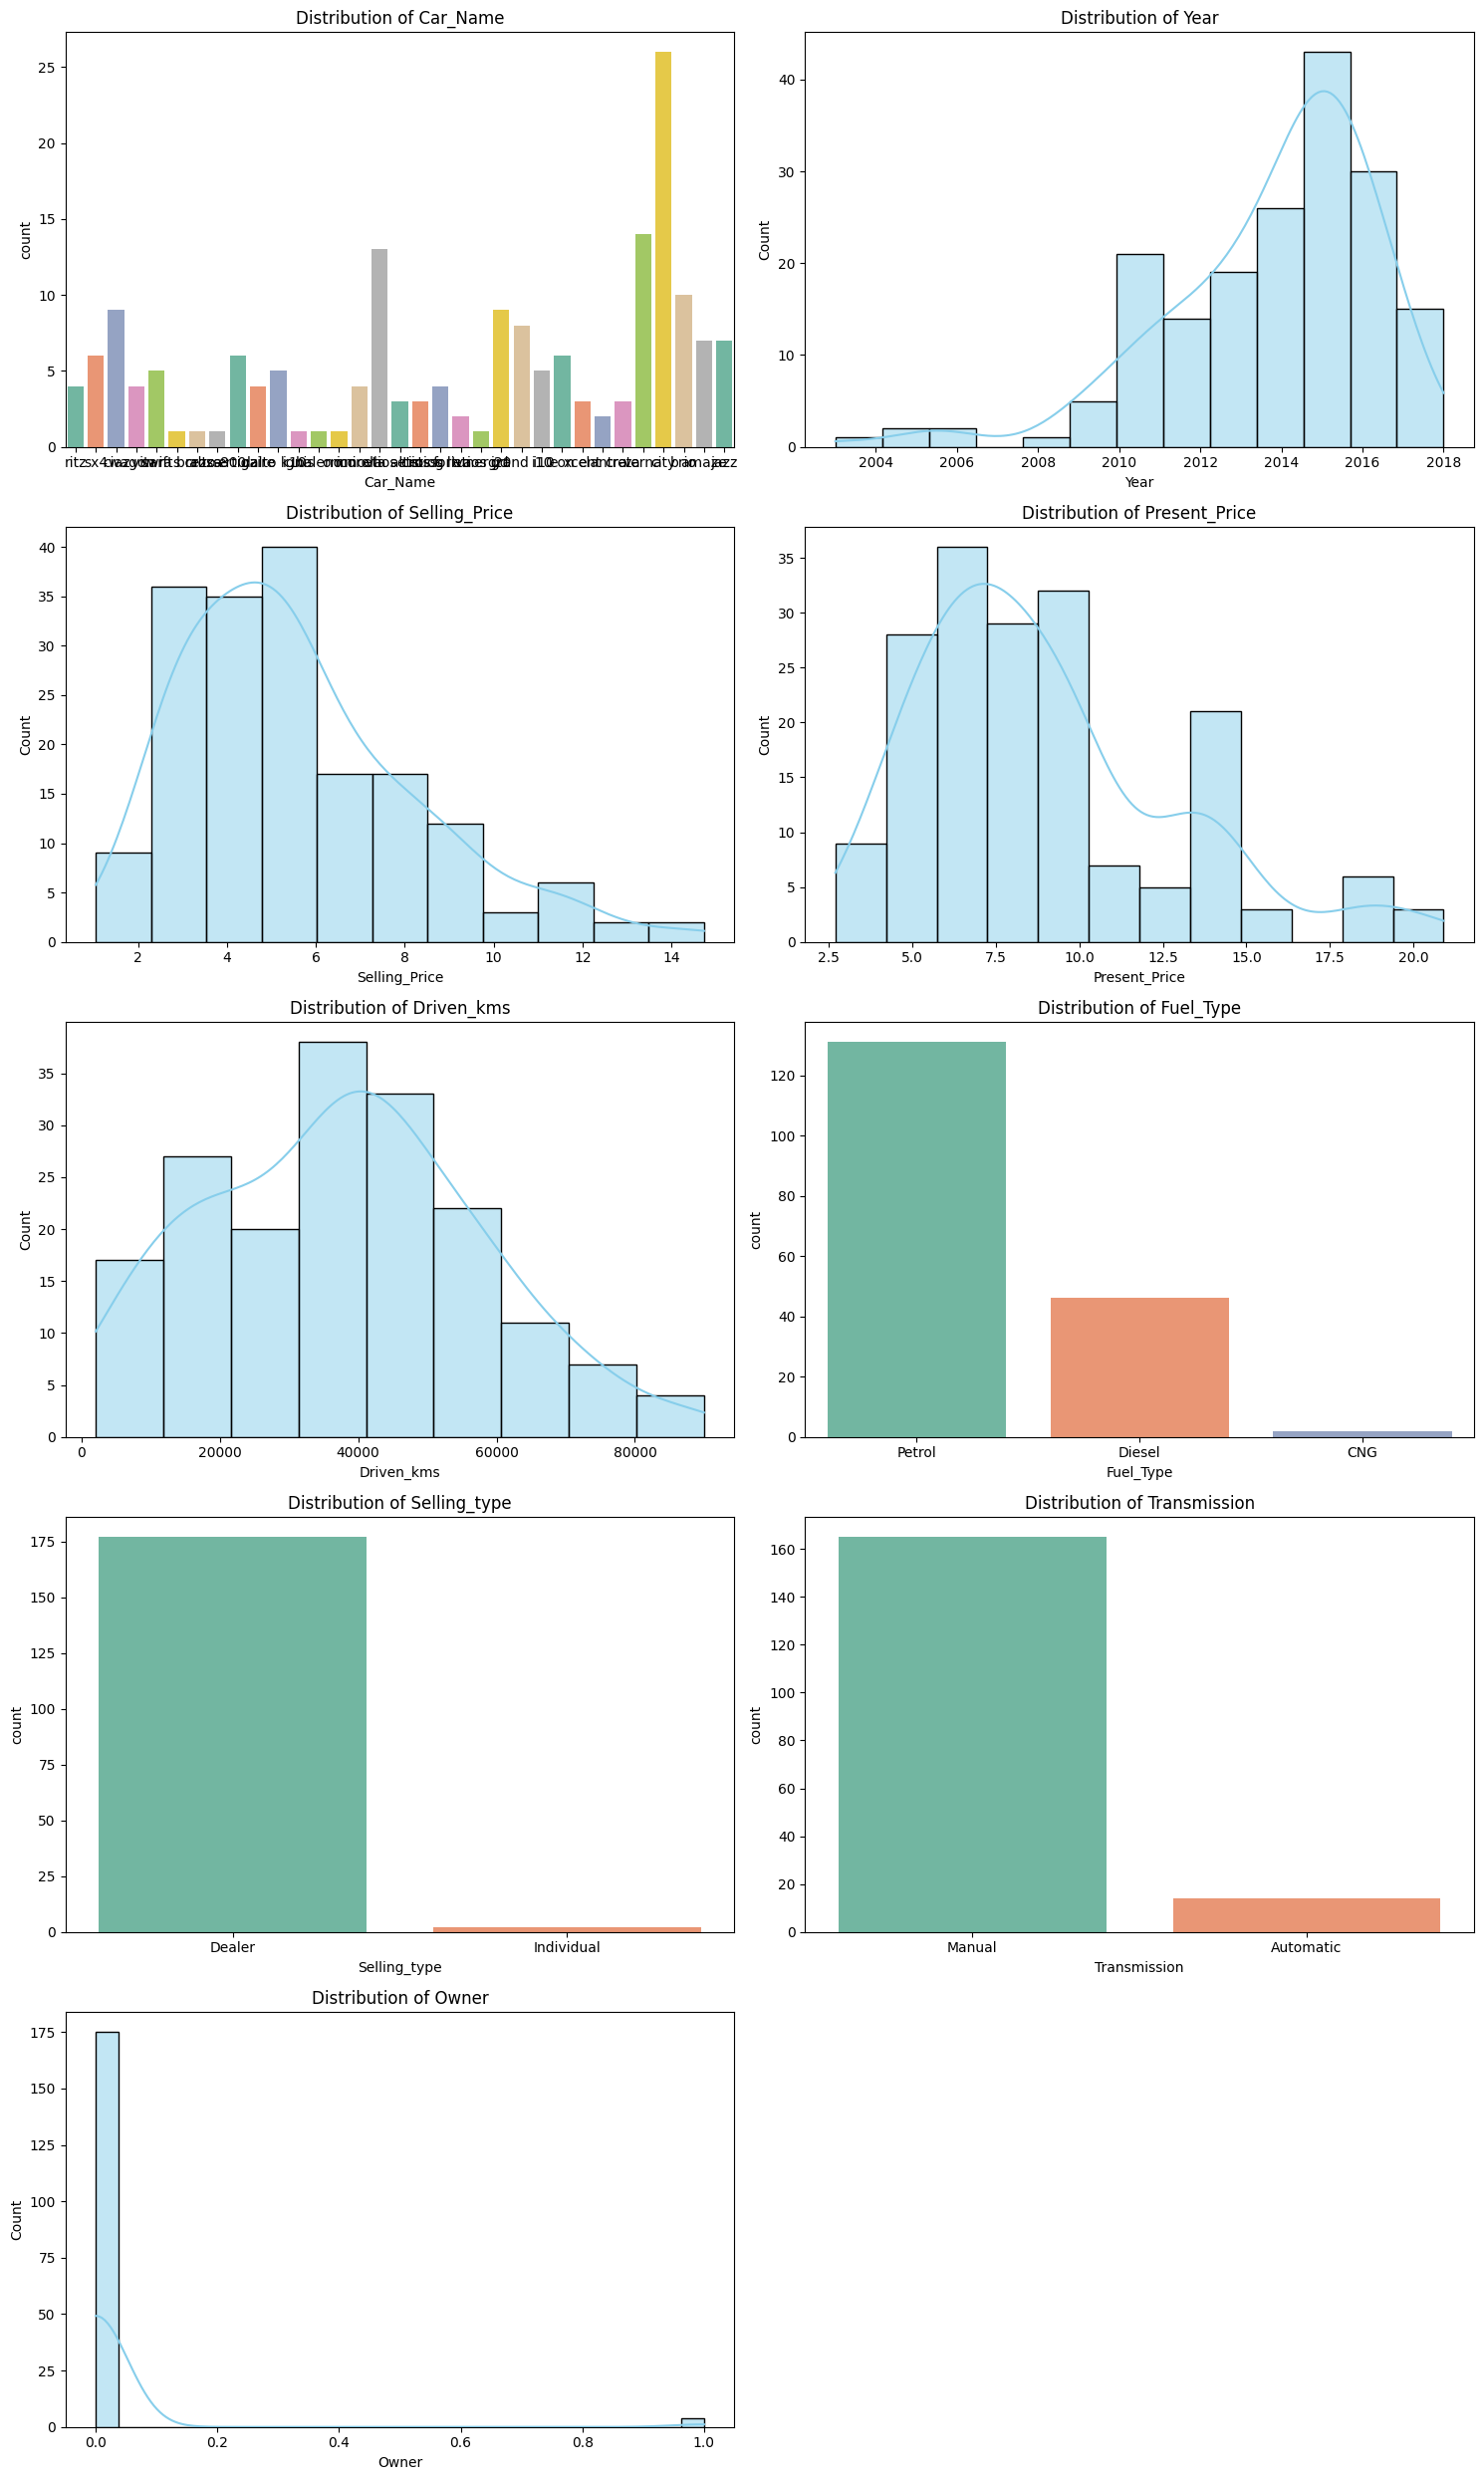

In [46]:
categorical_cols = data.select_dtypes(include='object').columns.tolist()
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
plt.figure(figsize=(15, 5 * ((len(data.columns) + 1) // 2)))

for i, column in enumerate(data.columns):
    plt.subplot((len(data.columns) + 1) // 2, 2, i + 1)
    if column in categorical_cols:
        sns.countplot(x=column, data=data, hue=column, palette='Set2', legend=False)
    else:
        sns.histplot(data[column], kde=True, color='skyblue')
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

<Axes: xlabel='Selling_Price', ylabel='Count'>

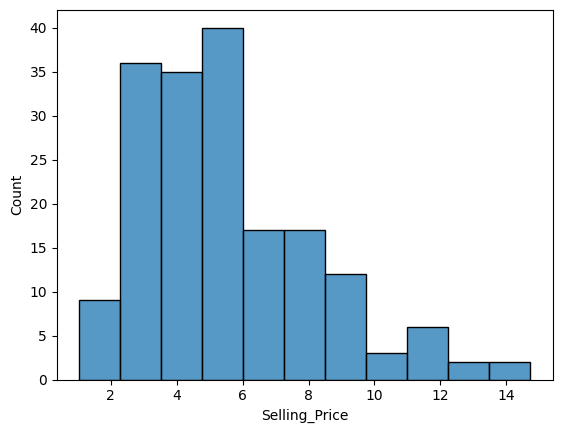

In [47]:
sns.histplot(data=data,x="Selling_Price")

<Axes: xlabel='Present_Price', ylabel='Count'>

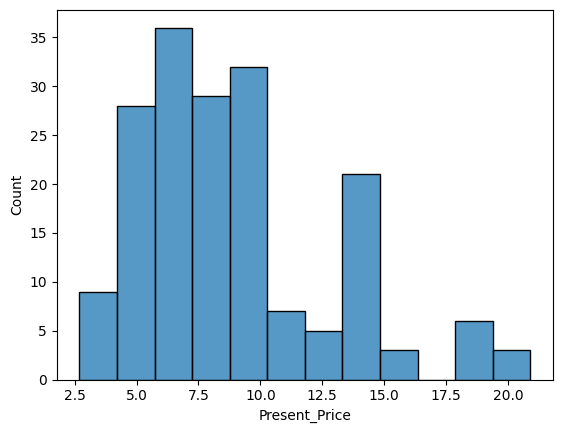

In [48]:
sns.histplot(data=data,x="Present_Price")

<Axes: xlabel='Driven_kms', ylabel='Count'>

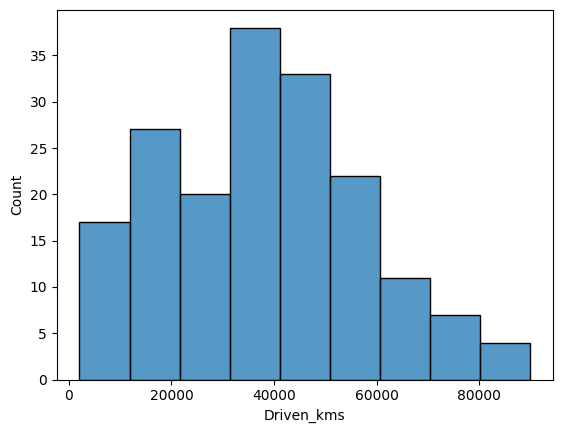

In [49]:
sns.histplot(data=data,x=data["Driven_kms"])

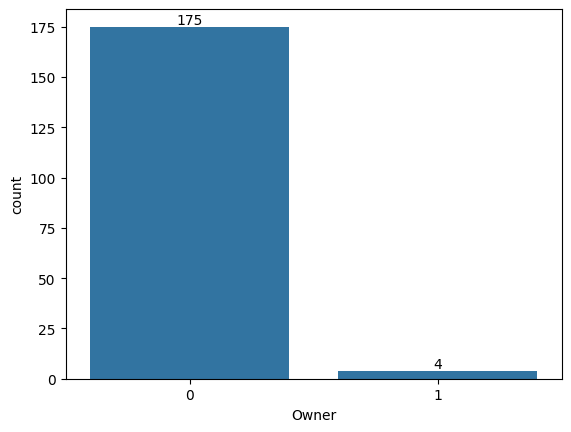

In [50]:
bar = sns.countplot(data=data,x="Owner")
for bars in bar.containers:
    bar.bar_label(bars)

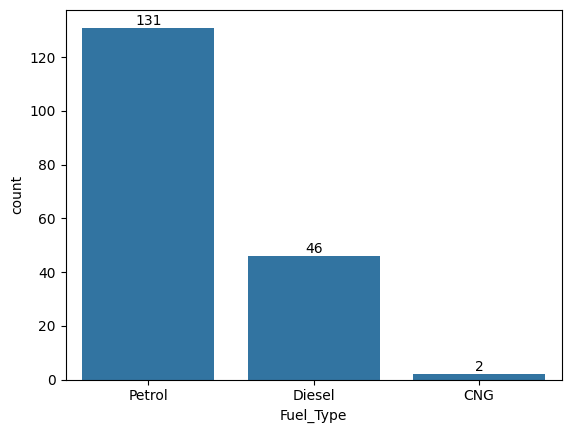

In [51]:
bar = sns.countplot(data=data,x="Fuel_Type")
for bars in bar.containers:
    bar.bar_label(bars)

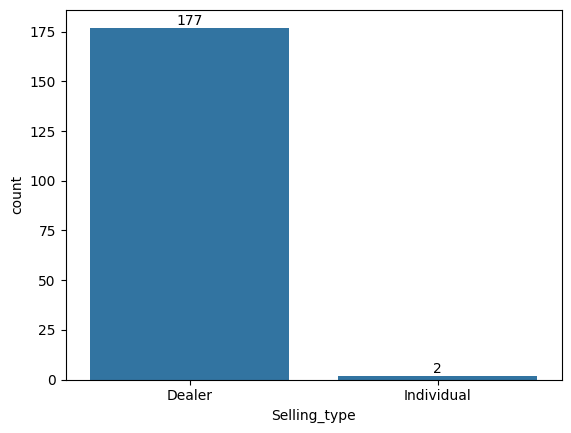

In [52]:
bar = sns.countplot(data=data,x="Selling_type")
for bars in bar.containers:
    bar.bar_label(bars)

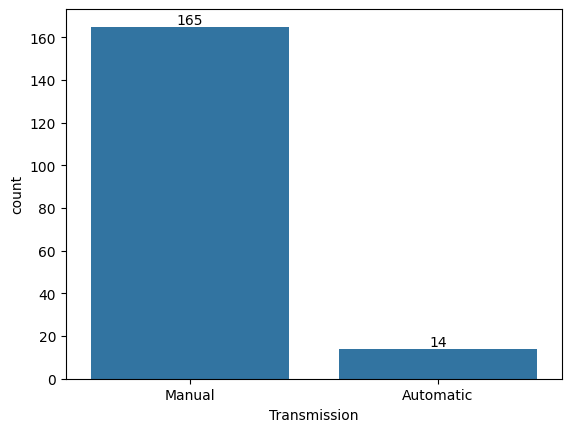

In [53]:
bar = sns.countplot(data=data,x="Transmission")
for bars in bar.containers:
    bar.bar_label(bars)

<Axes: xlabel='Selling_Price', ylabel='Present_Price'>

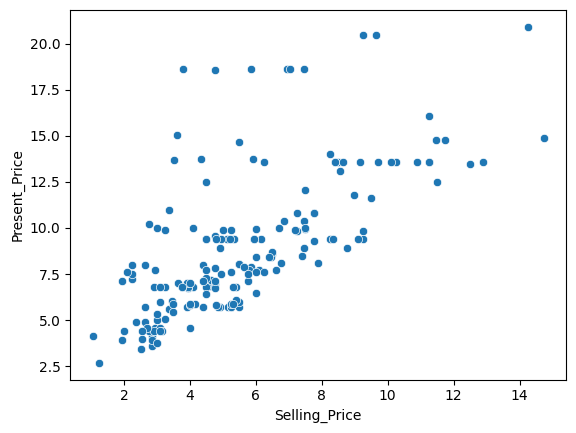

In [54]:
sns.scatterplot(data=data,x="Selling_Price",y="Present_Price")

<Axes: xlabel='Present_Price', ylabel='Driven_kms'>

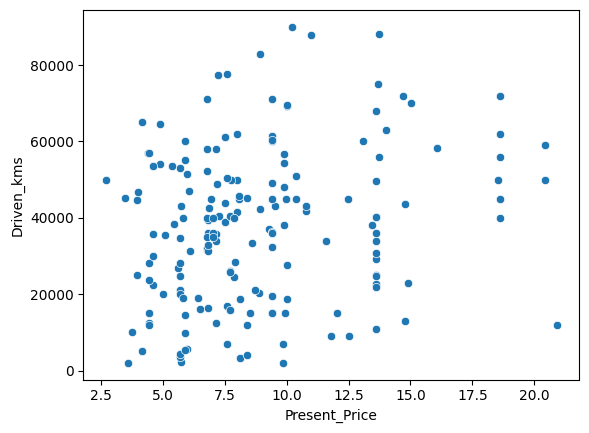

In [55]:
sns.scatterplot(data=data,x="Present_Price",y="Driven_kms")

<Axes: xlabel='Present_Price', ylabel='Year'>

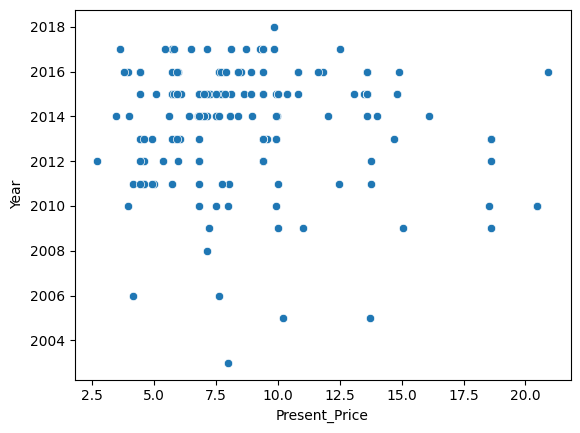

In [56]:
sns.scatterplot(data=data,x="Present_Price",y="Year")

<Axes: xlabel='Present_Price', ylabel='Year'>

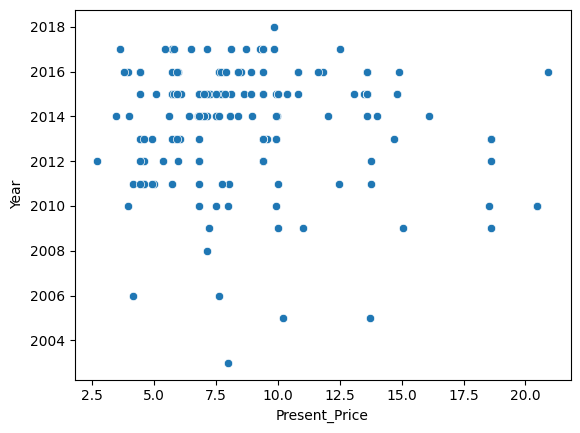

In [57]:
sns.scatterplot(data=data,x="Present_Price",y="Year")

<Axes: xlabel='Year', ylabel='Driven_kms'>

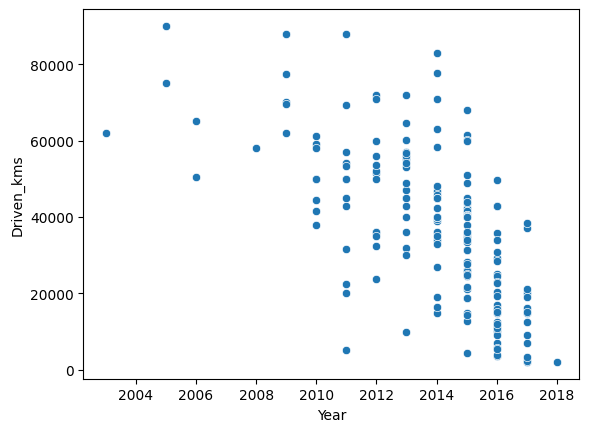

In [58]:
sns.scatterplot(data=data,x="Year",y="Driven_kms")

In [59]:
from sklearn.preprocessing import LabelEncoder
def encode_categorical_column(df, column_name):

    le = LabelEncoder()
    label = le.fit_transform(df[column_name])
    df.drop(column_name, axis=1, inplace=True)
    df[column_name] = label
    return df

In [60]:
encode_categorical_column(df=data, column_name="Selling_type")
encode_categorical_column(df=data, column_name="Fuel_Type")
encode_categorical_column(df=data, column_name="Transmission")
encode_categorical_column(df=data, column_name="Owner")
encode_categorical_column(df=data, column_name="Car_Name")


,Year,Selling_Price,Present_Price,Driven_kms,Selling_type,Fuel_Type,Transmission,Owner,Car_Name
0,2014-01-01,3.35,5.59,27000,0,2,1,0,25
1,2013-01-01,4.75,9.54,43000,0,1,1,0,28
2,2017-01-01,7.25,9.85,6900,0,2,1,0,5
3,2011-01-01,2.85,4.15,5200,0,2,1,0,31
4,2014-01-01,4.60,6.87,42450,0,1,1,0,27
...,...,...,...,...,...,...,...,...,...
174,2016-01-01,9.50,11.60,33988,0,1,1,0,6
175,2015-01-01,4.00,5.90,60000,0,2,1,0,4
176,2009-01-01,3.35,11.00,87934,0,2,1,0,6
177,2017-01-01,11.50,12.50,9000,0,1,1,0,6


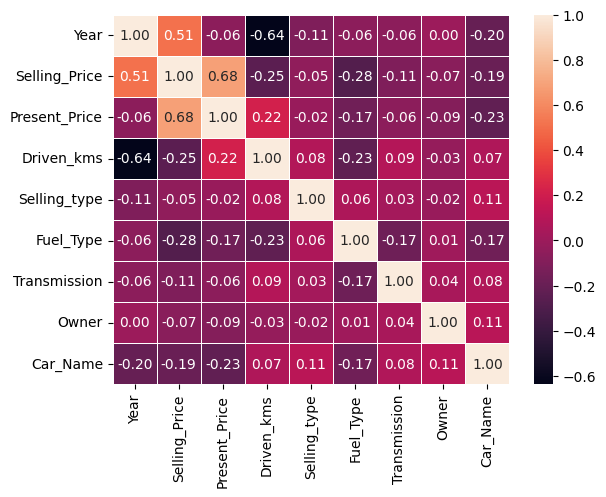

In [61]:
corr = data.corr()
sns.heatmap(corr,annot=True,fmt=".2f", linewidth=.5)
plt.show()